In [2]:
import numpy as np 
import pandas as pd 

def optimal_weights(sigma,mu):
    wgt = np.linalg.inv(sigma) @ mu 
    wgt = wgt / np.abs(wgt).sum()
    return wgt

def eqvol_weights(sigma):
    wgt = 1/np.sqrt(np.diag(sigma))
    wgt = wgt / np.abs(wgt).sum()
    return wgt

def sr_weights(sigma,mu):
    wgt = mu / np.diag(sigma) 
    wgt = wgt / np.abs(wgt).sum()
    return wgt

def gen_strat_returns():
    np.random.seed(5)
    
    corr = [[1, 0.3, 0],
            [0.3, 1, 0],
            [0,   0, 1]]
    
    corr = np.array(corr)
    
    vols = np.diag(np.array([0.1, 0.06, 0.02])) / np.sqrt(252)
    
    sigma = vols @ corr @ vols
    
    mu = np.array([0.1,0.12,0.04]) / 252
    
    dates = pd.date_range('20100101','20191231',freq='B')
    
    rets = np.random.multivariate_normal(mu, sigma, size = len(dates))
    rets = pd.DataFrame(rets,columns = ['A','B','C'], index = dates)
    return rets

In [3]:
rets = gen_strat_returns()
rets

,A,B,C
2010-01-01,-0.002059,-0.001372,0.003221
2010-01-04,0.001871,0.001262,0.002152
2010-01-05,0.006595,-0.000055,0.000395
2010-01-06,0.003519,-0.003050,-0.000099
2010-01-07,0.002096,0.003119,-0.001939
...,...,...,...
2019-12-25,-0.008275,-0.004177,0.000527
2019-12-26,0.005651,-0.002126,0.000724
2019-12-27,-0.005615,0.002277,0.003227
2019-12-30,0.000157,-0.003438,0.000166


<Axes: >

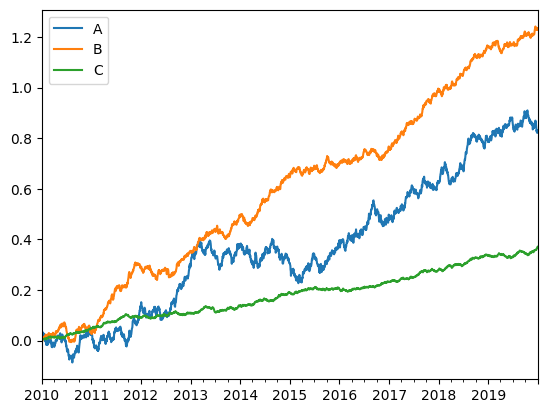

In [4]:
rets.cumsum().plot()

In [5]:
stats = {}
stats['ret'] = rets.mean()*252
stats['vol'] = rets.std()*np.sqrt(252)
stats['SR'] = rets.mean() / rets.std()*np.sqrt(252)
stats = pd.DataFrame(stats)
stats

,ret,vol,SR
A,0.080349,0.099250,0.809560
B,0.119119,0.059490,2.002332
C,0.035777,0.020361,1.757164


### Can get Sigma matrix by using in built .cov() function

In [6]:
sigma = rets.cov()
sigma 

,A,B,C
A,3.908957e-05,6.981310e-06,-2.034364e-07
B,6.981310e-06,1.404386e-05,3.448106e-09
C,-2.034364e-07,3.448106e-09,1.645099e-06


In [7]:
corr = rets.corr()
corr

,A,B,C
A,1.000000,0.297964,-0.025369
B,0.297964,1.000000,0.000717
C,-0.025369,0.000717,1.000000


### Can get Mu by using in built .mean() function

In [8]:
mu = rets.mean()
mu

A    0.000319
B    0.000473
C    0.000142
dtype: float64

In [9]:
weights = {}
weights['opt'] = optimal_weights(sigma,mu)
weights['eqvol'] = eqvol_weights(sigma)
weights['sr'] = sr_weights(sigma,mu)
weights = pd.DataFrame(weights)
weights.round(2)

,opt,eqvol,sr
A,0.02,0.13,0.06
B,0.26,0.22,0.26
C,0.71,0.65,0.67


In [10]:
combo_rets={}
combo_rets['opt'] = (rets*weights['opt']).sum(1)
combo_rets['eqvol'] = (rets*weights['eqvol']).sum(1)
combo_rets['sr'] = (rets*weights['sr']).sum(1)
combo_rets = pd.DataFrame(combo_rets)
combo_sr = combo_rets.mean() / combo_rets.std() * np.sqrt(252)
combo_sr

opt      2.676739
eqvol    2.426157
sr       2.635691
dtype: float64

In [11]:
constant = 5
scaled = (rets*(weights['opt']*constant)).sum(1)
scaled.mean()/scaled.std()*np.sqrt(252)


np.float64(2.6767391373599727)